In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic.csv")
df=data.copy() #copy data
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.drop("Name" , axis=1 , inplace=True)
df.shape

(891, 11)

In [7]:
df.drop("Ticket" , axis=1 , inplace=True)
df.shape

(891, 10)

In [8]:
print(df["Cabin"].unique()[0:5])
df.drop("Cabin" , axis=1 , inplace=True)
df.shape

[nan 'C85' 'C123' 'E46' 'G6']


(891, 9)

In [9]:
df["Embarked"].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df["Fare"].unique()
df.drop("Fare" , axis=1 , inplace=True)
df.shape

(891, 8)

In [11]:
df["PassengerId"].unique()
df.drop("PassengerId" , axis=1 , inplace=True)
df.shape

(891, 7)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000,3.0,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.000,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.000,0.0,0.0,6.0


In [13]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent
missing_percent(df)

Embarked     0.224467
Age         19.865320
dtype: float64

In [14]:
df.isnull().sum()
#cabin'de çok veri eksik , silelim.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [15]:
#age kısmı ile ilgilen.
avg_age = df["Age"].astype("float").mean(axis=0)
#df["Age"].replace(np.nan, "avg_age", inplace=True)
#or 
df["Age"] = df["Age"].fillna(avg_age)
df["Age"].isnull().sum()

0

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [17]:
#Embarked
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64
(889, 7)


In [18]:
df["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

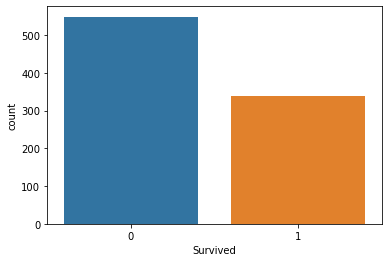

In [19]:
sns.countplot(x="Survived" , data=df)

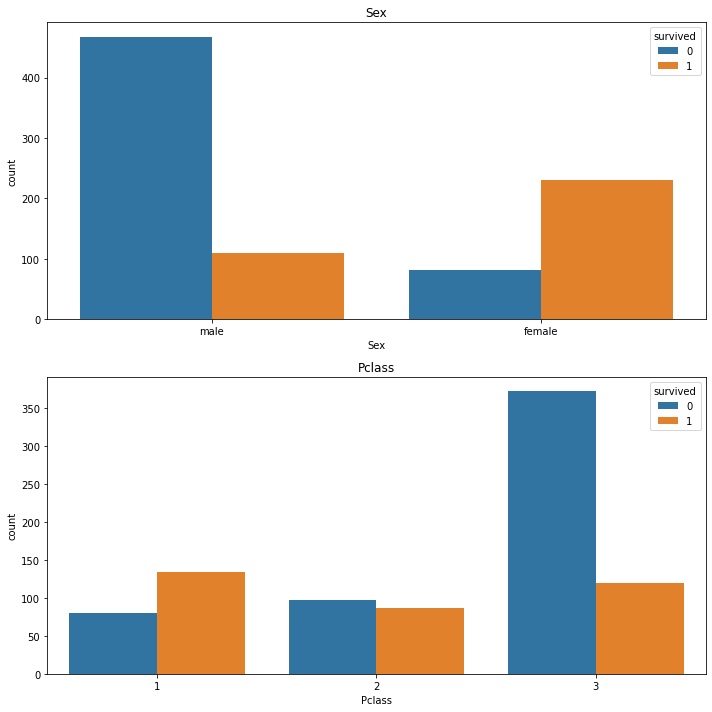

In [28]:
cols = ['Sex', 'Pclass']

n_rows = 2
#n_cols = 1 fig, axs = plt.subplots(n_rows, n_cols,figsize=(10,10))


fig, axs = plt.subplots(n_rows,figsize=(10,10))

for r in range(0,n_rows):
    #for c in range(0,n_cols):  
        
        #i = r*n_cols+ c #index to go through the number of columns       
        #ax = axs[r][c] #Show where to position each subplot
        ax = axs[r]
        sns.countplot(x=df[cols[r]], hue=df["Survived"], ax=ax) #i
        ax.set_title(cols[r]) #i
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

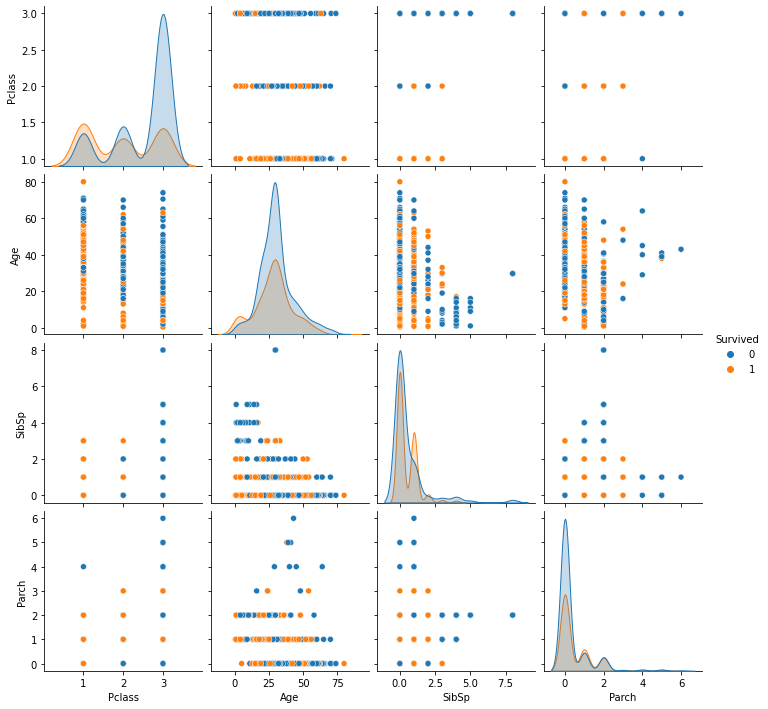

In [29]:
sns.pairplot(df , hue ="Survived")

In [30]:
df.groupby("Sex" ,)[["Survived"]].mean()

,Survived
Sex,
female,0.740385
male,0.188908


In [31]:
df.groupby("Pclass")[["Survived"]].mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Sex'>

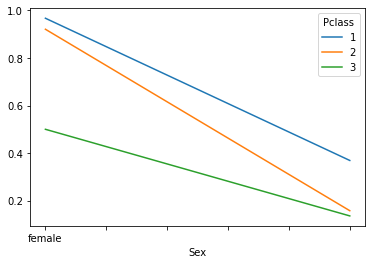

In [32]:
df.pivot_table("Survived" , index="Sex" , columns="Pclass").plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

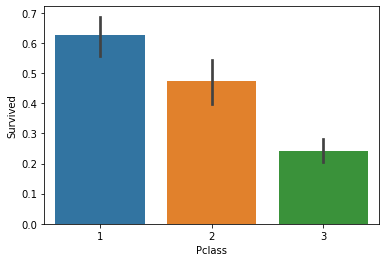

In [33]:
sns.barplot(x="Pclass" , y="Survived" , data=df)
#1.class daha çok hayatta kalmış diyebiliriz.

In [34]:
age = pd.cut(df["Age"] , [0,18,80])
df.pivot_table("Survived" , ["Sex" , age] , "Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975309  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 87.9+ KB


In [36]:
#get_dummies , label_encoder , OHE
#df=pd.get_dummies(df,columns=["Sex"]).head(3)

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6].values)

In [37]:
print(df["Sex"].unique())
print(df["Embarked"].unique())

[1 0]
[2 0 1]


In [38]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Embarked      int32
dtype: object

<AxesSubplot:xlabel='Sex', ylabel='count'>

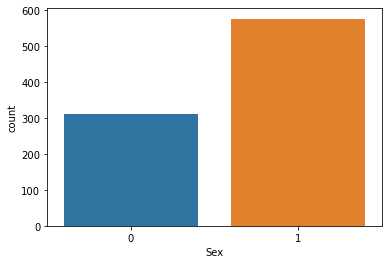

In [39]:
sns.countplot(x="Sex", data=df)
#0=male

<AxesSubplot:>

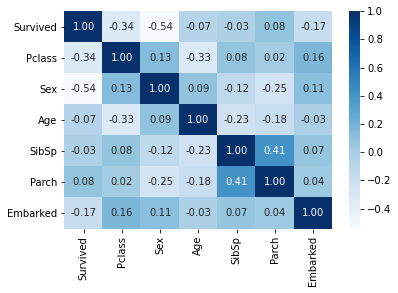

In [40]:
sns.heatmap(df.corr() , annot=True , fmt=".2f",cmap="Blues")
#pclass ve age
#survived ve sex
#parch ve sex
#embarked ve survived arasında güçlü corr var.

In [41]:
#Yaptığımız analiz sonucu Kurtulma Oranında Cinsiyet etkin rol oynamıştır.

In [42]:
#Split X and Y
X = df.iloc[:,1:7]
Y = df.loc[:,["Survived"]]

In [43]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0


In [44]:
Y.head(2)

,Survived
0,0
1,1


In [45]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y, test_size=0.33 , random_state=42)

In [46]:
print("X_train shape " , X_train.shape)
print("X_test shape " , X_test.shape)
print("y_train shape " , y_train.shape)
print("y_test shape " , y_test.shape)

X_train shape  (595, 6)
X_test shape  (294, 6)
y_train shape  (595, 1)
y_test shape  (294, 1)


In [47]:
#models classification function

def class_model_fit(X_train , y_train):
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    logReg = LogisticRegression(random_state=2)
    logReg.fit(X_train , y_train)
    
    #SVM linear
    from sklearn.svm import SVC
    svc_lineer = SVC(kernel ="rbf" , random_state=2)
    svc_lineer.fit(X_train, y_train)
     
    #SVM rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel ="linear" , random_state=2)
    svc_rbf.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors = 5 , metric="euclidean" , p=2)
    knn.fit(X_train, y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion="entropy" , random_state=2)
    tree.fit(X_train, y_train)

    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    randomForest = RandomForestClassifier(n_estimators=10 ,criterion="entropy", random_state=2)
    randomForest.fit(X_train, y_train)
    
    print("[0]Logistic Reg. training accuracy" , logReg.score(X_train, y_train))
    print("[1]KNN training accuracy**********" , knn.score(X_train, y_train))
    print("[2]svc_linear training accuracy***" , svc_lineer.score(X_train, y_train))
    print("[3]svc rbf accuracy***************" , svc_rbf.score(X_train, y_train))
    print("[4]Gausian Naive training accuracy" , gauss.score(X_train, y_train))
    print("[5]Decision Tree training accuracy" , tree.score(X_train, y_train))
    print("[6]Random Forest training accuracy" , randomForest.score(X_train, y_train))
    
    
    
    
    return logReg , knn , svc_lineer , svc_rbf, gauss, tree ,randomForest



#parametreler ile oynabilirsin

In [48]:
class_model_fit(X_train,y_train.values.ravel())

[0]Logistic Reg. training accuracy 0.7899159663865546
[1]KNN training accuracy********** 0.853781512605042
[2]svc_linear training accuracy*** 0.6420168067226891
[3]svc rbf accuracy*************** 0.7815126050420168
[4]Gausian Naive training accuracy 0.7865546218487395
[5]Decision Tree training accuracy 0.9411764705882353
[6]Random Forest training accuracy 0.9277310924369748


(LogisticRegression(random_state=2),
 KNeighborsClassifier(metric='euclidean'),
 SVC(random_state=2),
 SVC(kernel='linear', random_state=2),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=2),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2))

In [49]:
# GRIDSEARCHCV kullanabilirsin.Hyperparameter Tuning
#https://github.com/doggukancelik/Machine-Learning/blob/main/p_IBM_SPACEX_CAPSTONE/Machine%20Learning%20Prediction_Spacex.ipynb

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train.values.ravel())
y_pred = rfc.predict(X_test)


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc_score = accuracy_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(acc_score)
print(f1_score)
#bla bla

0.7687074829931972
0.6880733944954128
